# Project 2: Quantum Dots
### Robert Sutherland Computational Physics (PHY480), Michigan State University

## Table of Contents
[1.0 Theory: Jacobi's Algorithm (a)](#cell1.0)

[1.1 Why is $\theta\le\frac{\pi}{4}?$](#cell1.1)

[1.3 Code Example: Jacobi's Algorithm](#cell1.3)

[2.0 Jacobi's Method Applied to Quantum dots (No Interaction) (b)](#cell2.0)

[2.1 Jacobi's Method Applied (No Interaction): Higher Resolution (b)](#cell2.1)

[2.2 Section 2 Results Summary (b)](#cell2.2)

[3.0 Adding Interactions Terms (c)](#cell3.0)

[3.1 Adding Interactions Terms: Higher Resolution (c)](#cell3.1)

[4.0 Plotting the Wave Function (d)](#cell4.0)

[4.1 Summary of Plots (d)](#cell4.1)

[5.0 Conclusion](#cell5.0)

# Preliminary Work: 
#### Theoretical Foundations
The contents of the next few cells are examples of simple cases that I have constructed as a basis of reference for myself throughout the course of this project.  I include them because they have future value as a tool for understanding my own code.  I feel that a quick glance at these sections will offer the best idea of how much of the in-class material I am actually able to understand and that a review of later sections will offer an idea of what I am able to implement.  In this portion of the project I discuss the underlying theory and provide a simple example of Jacobi's algorithm. 

<a id="cell1.0"></a>
### Implement Jacobi's Method: 3X3 case

The theory that lies at the heart of Jacobi's Algorithm is the similarity transformation.  We apply an n-dimensional 
rotational matrix about an arbitrary angle.  The goal is to choose this angle daftly such that the non-diagonal 
elements approach zero.

###### Cosider a matrix A:
1.  Determine some tolernce limit $\epsilon$
2.  Pick out the largest Off(A) -> $Off(A)_{max}$.  If there is no largest element, that is that there are elements which are equally large then chose the element with lowest row index, if this is not sufficient then further chose the lowest column index.
3.  Apply the similarity transformation to obtain an equation.  Chose $\theta$ such that $Off(A)_{max} = 0$
4.  Sum $Off(A)$ to ensure that $\sqrt{\sum\limits_{i=1}^{n}\sum\limits_{j=1,j\neq i}^{n} Off(A)^2}\leq \epsilon$
5.  Iterate this process until the condition in step 4 is satisfied.

I chose to accomplish step 4 by imposing the slightly more stringent condition that
$\sqrt{(n^2 - n)(Off(A)_{max})^2}\leq \epsilon$.  
This condition is equivalent to assuming that all off-diagonal elements have a value equal to $Off(A)_{max}$.

You can think of step four as answering the question "how diagonal is your matrix?"  We seek a fully diagonalized form because this will allow us to easily read off the eigenvalues from the diagonal.  Once our matrix is sufficiently close to this form (all non-diagonal elements are sufficiently close to zero) we can say that our diagonal elements approximate the true eigenvalues.  It is also important to note that a similarity transformation, though it does change the eigen $\it{vectors}$ has no effect on the eigen $\it{values}$.

For the code below we choose an arbitrary 3X3 matrix A with eigenvalues $\lambda_n=n$ so that $\lambda_1=1 \hspace{0.25cm} \lambda_2=2....$  To create a case which is analagous to the problem we will solve for the project I will chose the elements on either side of the diagonal to be some small value for now let's say that value is 0.5.  Our matrix A then takes the following form.

$\hspace{8.0cm}\textbf{A}=
\begin{bmatrix}
1 & 0.5 & 0 \\
0.5 &  2 & 0.5 \\
0  & 0.5 & 3  \\
\end{bmatrix}$

To implement Jacobi's method we need to apply the similarity transformation using a matrix S.  We construct the specific form of S by first initializing an identity matrix.  We then replace the appropriate elements with $cos(\theta)$ and $sin(\theta)$.  This matrix must perform a rotation about some axis.  We chose this axis based on which elements we are trying to bring to zero.  An example of a 3-D rotation matrix is given below.  We will then construct the matrix B via similarity transformation with S.

$\hspace{3.0cm}\textbf{S}=
\begin{bmatrix}
1  & 0 & 0  \\
0 &  cos(\theta) & -sin(\theta) \\
0  & sin(\theta) &  cos(\theta)  \\
\end{bmatrix}\hspace{5.0cm}\textbf{B} = \textbf{S}^{-1} \textbf{AS}$

We have thus outlined the basic steps, but we should take some time to further describe two things: what the form of S must necessarily be (corresponding to the rotational axis), and how we find the rotational angle ($\theta$).

###### Finding Rotational Axis and Form of S:
Let me first introduce a new kind of notation to represent matrix $\textbf{A}$.  Remember that the goal is to pick out the largest elements according to step 2 and then to chose $\theta$ such that this element goes to zero.  That means that $\theta$ will ultimately be determined by our choice of the element we want to zero out.  I call this element the target element and represent it by the target symbol ($\odot$).  All other elements are of little interest to us for the time being so they are represented by periods (.).  Under this new notation the matrix A becomes and the elment of interest become $a_{\odot}$

$\hspace{8.0cm}\textbf{A}=
\begin{bmatrix}
. & a_{\odot} & . \\
. &  . & . \\
.  & . & .  \\
\end{bmatrix}$

Working out simple similarity transformations by hand quickly reveals that certain elements surrounding the target are also relevent in determing the value of the target spot in the resulting matrix $\textbf{B}$.  Let the target element now have indices k & l so that $a_{\odot} = a_{kl}$.  The corresponding element in $\textbf{B}$ is then $b_{kl} = 0$.  Using a combination of these notations we can yet again recast the matrix $\textbf{A}$.

$\hspace{8.0cm}\textbf{A}=
\begin{bmatrix}
a_{kk} & a_{\odot} & . \\
a_{lk} &  a_{ll} & . \\
.  & . & .  \\
\end{bmatrix}$

The algebra for the simple cases tells us that we need to place the cos functions at $s_{kk}=s_{ll}=cos(\theta)$ and the sin functions at $s_{kl}=-s_{lk}=-sin(\theta)$.  Following all the rules we have so far established we can construct $\textbf{S}$ for this case.

$\hspace{7.5cm}\textbf{S}=
\begin{bmatrix}
cos(\theta) & sin(\theta) & 0 \\
-sin(\theta) &  cos(\theta) & 0 \\
0  & 0 & 1  \\
\end{bmatrix}$

###### Finding $\theta$:
Now that we have a procedure for finding $\textbf{S}$ we need to examine how the trigfunctions of $\textbf{S}$ interact with the elements of interest in $\textbf{A}$.  Carrying out the multiplication results in an equation for the transformed target element in matrix $\textbf{B}$. 

$\hspace{5.5cm}
\begin{equation}
b_{\odot}=(a_kk-a_ll)cos(\theta)sin(\theta)+a_{kl}(cos^2(\theta)-sin^2(\theta))
\end{equation}$

So with all of our mathematics we have managed to change the game a little bit.  The goal now is to ensure that we chose theta appropriatley so that $b_{\odot}=0$.  Setting $b_{\odot}=0$ in the equation above we conclude that 

<a id="cell1.1"></a>
$\hspace{7.25cm}
\begin{equation}
\theta=\frac{1}{2}\arctan(\frac{2a_{\odot}}{a_{kk}-a_{ll}})
\end{equation}$

There are two more things worth noting about the equation above:  The arctangent function is bounded $\frac{-pi}{4}\le\arctan(\theta)\le\frac{pi}{4}$.  The factor of one half fixes the maximum value attainable in our algorithm at $\theta=\frac{\pi}{4}$.  You will also notice (if you have been assiduous in your calculation) that I have dropped a negative sign.  that is because I will be using the absolute value of theta in the algorithm and tangent is an odd function anyways so it turns out to be irrelevent (mathematicians forgive me).

<a id="cell1.0.1"></a>
#### EigenValues and EigenVectors
Similarity transformations have the property that they perserve the eigenvalues.  The eigenvectors however, are not preserved.  Luckily the nature of the transformation makes it easy to relate the new eigenvectors to the eigenvectors of your original matrix.

We start with a matrix $\textbf{A}$ on which we apply our transformation matrix $\textbf{S}$ to obtain $\textbf{B} = \textbf{SA}\textbf{S}^{-1}$.  Consder $\vec{v}$, and eigen vector of $\textbf{A}$ with eigen value $\lambda$.  Let us define a new eigen vector $\vec{u}$ = $\textbf{S}\vec{v}$.  Now let us examine the properties of this new vector.  

If I apply $\textbf{B}$ onto $\vec{u}$ I get $B\vec{u} = \textbf{SA}\textbf{S}^{-1}\textbf{S}\vec{v}$.  The S and S inverse cancel to give me unity.  Because $\vec{v}$ is an eigen vector of $\textbf{A}$ I am left with $\lambda\textbf{S}\vec{v} = \lambda\vec{u}$.  This means that $\vec{u}$ is an eigenvector of $\textbf{B}$.  We also now have a method for relating the two eigen vectors, namely

$$\vec{v} = \textbf{S}^{-1}\vec{u}$$

Once we are finished finding the eigen vectors of our transformed matrix, which are trivial since it is diagonal.  We can obtain our original eigen vectors by way of this transformation.

<a id="cell1.3"></a>

In [1]:
#Program the solution for 3X3 matrix outlined in section 7.4 of the lecture notes.

import numpy as np
import math 

#Set iteration count = 0
step_number = 0

#Specify the tolerence limit (step 1).
epsilon = 10**(-8)
#Initialize the matrix
A = np.array([[1.0, 0.5, 0.0],
             [0.5, 2.0, 0.5],
             [0.0, 0.5, 3.0]])
n = A.shape[0] #get the number of rows in the matrix

print("Python gives the Eigenvalues as :",np.linalg.eigh(A)[0],
      "\nDo these agree with our results?\n")

#Locate the indices largest off-diagonal element (step2).
def OffA_max(in_matrix):
    mask = np.ones(in_matrix.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    indices = np.where(np.absolute(in_matrix) == np.absolute(in_matrix[mask]).max())
    global i_max; global j_max
    i_max = indices[0][0] 
    j_max = indices[1][0]
    global offA_max
    offA_max = in_matrix[i_max][j_max]

OffA_max(A)

#Determine theta & calculate sin/cos
theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
c = math.cos(theta)
s = math.sin(theta)

#Construct matrix S (step 3)
S = np.zeros(A.shape, dtype=float)
np.fill_diagonal(S, 1)
S[i_max][i_max] = S[j_max][j_max] = c
S[i_max][j_max] = s
S[j_max][i_max] = -s
#Calculate the transpose of S
S_t = np.matrix.transpose(S)

#Multiply out the matricies 
S_tA = np.dot(S_t,A)
B = S_tAS = np.dot(S_tA,S)
A = S_tAS
OffA_max(A)
step_number = step_number + 1
S_net = S

#While loop conditional (step 5)
while (math.sqrt(n**2-n)*abs(offA_max) >= epsilon):
    #Determine theta & calculate sin/cos
    theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
    c = math.cos(theta)
    s = math.sin(theta)

    #Construct matrix S (step 3)
    S = np.zeros(A.shape, dtype=float)
    np.fill_diagonal(S, 1)
    S[i_max][i_max] = S[j_max][j_max] = c
    S[i_max][j_max] = s
    S[j_max][i_max] = -s
    #Calculate the transpose of S
    S_t = np.matrix.transpose(S)

    #Multiply out the matricies 
    S_tA = np.dot(S_t,A)
    B = S_tAS = np.dot(S_tA,S)
    A = S_tAS
    S_net = np.dot(S,S_net)
    OffA_max(A)
    
    step_number = step_number + 1

#Print off A and the eigenvalues
print("Similarity Transformed Matrix:\n",A,"\n")
print("EigenValues:",end=" ")
i=0
while (i < n-1): 
    print(np.diagonal(A)[i],end=", ")
    i=i+1
print(np.diagonal(A)[i])
print("Number of iterations:", step_number)

#Build Eigenvectors of B and store them as columns in a matrix
Eigen_vectorB = np.zeros([n])
Eigen_vectorB.shape=(n,1)
Eigen_vectorB[i]=1
Eigen_matrixA=np.dot(S_net,Eigen_vectorB)
i=1
while (i < n):
    Eigen_vectorB = np.zeros([n])
    Eigen_vectorB.shape=(n,1)
    Eigen_vectorB[i]=1
    Eigen_vectorA=np.dot(S_net,Eigen_vectorB)
    Eigen_matrixA=np.hstack((Eigen_matrixA,Eigen_vectorA))
    i=i+1
def column(matrix, i):
    return [row[i] for row in matrix]

#Pick an eigenvector (column k) out of your matrix
#k = Eigenvector number - 1; For 3X3 k(0:2) 
k=2
nthEigen_valueA=column(Eigen_matrixA,k)
print("\n","Eigenvector",k+1,"of matrix A:\n",nthEigen_valueA)

Python gives the Eigenvalues as : [ 0.77525513  2.          3.22474487] 
Do these agree with our results?

Similarity Transformed Matrix:
 [[  7.75255129e-01   5.90510175e-16   2.11758237e-22]
 [  3.68466040e-16   3.22474487e+00  -2.61630587e-10]
 [ -1.40975929e-17  -2.61630254e-10   2.00000000e+00]] 

EigenValues: 0.775255128608, 3.22474487139, 2.0
Number of iterations: 33

 Eigenvector 3 of matrix A:
 [-0.037568104921241706, 0.90826790668672286, -0.41669898869033239]


<a id="cell2.0"></a>
### Applying Jacobi's Method to Our Simple System 

Due to limitations on the computational power of my machine the code I have written will not run at sufficiently high resolution to return accurate results.  In order to circumvent this problem I show that if I initialize the matrix A and retreive the eigenvalues using python's np.linalg.eigh(A) function for low resolution cases the values are always in perfect agreement.  In the cell after the one below I thensolve the eigenvalues at high resolution using python's solver.  

Perhaps you will have better luck running this on your system.

In [2]:
import numpy as np
import math
#step size must be small due to old laptop :(
#It took me 4 hours to figure this out....

#Set up our step number and bounds
n = 100
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#Initialize vector V
V=np.zeros([n+1])
#Build vector V
i = 1
while (i < n):
    V[i] = (P_min+ i*h)**2
    i+=1
V[n] = (P_max)**2

#Create the matrix for the Schrodinger Equation
e_n = 1/h**2 #only do this computation once
A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
#Initialize Matrix A
A=A_row1
#Build Matrix A
i=2
while (i<n-2):
    A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
    A_next[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_next))
    i+=1
A_last=np.zeros([n-2]);A_last[i-2]=-e_n
A_last[i-1]=2*e_n+V[i]
A=np.vstack((A,A_last))

print("Python's Eigen Values:",np.linalg.eigh(A)[0][0],np.linalg.eigh(A)[0][1],np.linalg.eigh(A)[0][2])
#Carry out the transformation
#Locate the indices largest off-diagonal element (step2).
def OffA_max(in_matrix):
    mask = np.ones(in_matrix.shape, dtype=bool)
    np.fill_diagonal(mask, 0)
    indices = np.where(np.absolute(in_matrix) == np.absolute(in_matrix[mask]).max())
    global i_max; global j_max
    i_max = indices[0][0] 
    j_max = indices[1][0]
    global offA_max
    offA_max = in_matrix[i_max][j_max]

OffA_max(A)

#Determine theta & calculate sin/cos
theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
c = math.cos(theta)
s = math.sin(theta)

#Construct matrix S (step 3)
S = np.zeros(A.shape, dtype=float)
np.fill_diagonal(S, 1)
S[i_max][i_max] = S[j_max][j_max] = c
S[i_max][j_max] = s
S[j_max][i_max] = -s
#Calculate the transpose of S
S_t = np.matrix.transpose(S)

#Set iteration count = 0
step_number = 0
#Multiply out the matricies 
S_tA = np.dot(S_t,A)
B = S_tAS = np.dot(S_tA,S)
A = S_tAS
OffA_max(A)
step_number = step_number + 1
S_net = S

#Specify the tolerence limit (step 1).
epsilon = 10**(-2)
#While loop conditional (step 5)
while (abs(offA_max) >= epsilon):
    #Determine theta & calculate sin/cos
    theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
    c = math.cos(theta)
    s = math.sin(theta)

    #Construct matrix S (step 3)
    S = np.zeros(A.shape, dtype=float)
    np.fill_diagonal(S, 1)
    S[i_max][i_max] = S[j_max][j_max] = c
    S[i_max][j_max] = s
    S[j_max][i_max] = -s
    #Calculate the transpose of S
    S_t = np.matrix.transpose(S)

    #Multiply out the matricies 
    S_tA = np.dot(S_t,A)
    B = S_tAS = np.dot(S_tA,S)
    A = S_tAS
    S_net = np.dot(S,S_net)
    OffA_max(A)
    
    step_number = step_number + 1

#Print off Iterations and Eigen Values
print("\nNumber of iterations:", step_number)
print("Our EigenValues:",end=" ")
i=0
while (i < 3): 
    print(sorted(np.diagonal(A))[i],end=", ")
    i=i+1

#Error Data as disagreement between my algorithm and python's solver
print("\n\nError = ABS(My_Value - Python's_Value)")
print("Error in First Eigen Value:",abs(sorted(np.diagonal(A))[0]-np.linalg.eigh(A)[0][0]))
print("Error in Second Eigen Value:",abs(sorted(np.diagonal(A))[1]-np.linalg.eigh(A)[0][1]))
print("Error in Third Eigen Value:",abs(sorted(np.diagonal(A))[2]-np.linalg.eigh(A)[0][2]))

Python's Eigen Values: 2.6867202568 6.11300882253 11.0573528563

Number of iterations: 298
Our EigenValues: 2.68672401711, 6.1130097286, 11.0573521263, 

Error = ABS(My_Value - Python's_Value)
Error in First Eigen Value: 3.76030905791e-06
Error in Second Eigen Value: 9.06069833384e-07
Error in Third Eigen Value: 7.30015189632e-07


<a id="cell2.1"></a>
### Applying Jacobi's Method to Our Simple System: Higher Resolution

It is now clear from the code above that the two algorithms are effectively in perfect agreement.  Now, to check that I have indeed constructed A correctly we can run python's code at higher resolution using the cell below.  You can check for yourself that as we up the resolution the values we get approach our predicted values.   

In [11]:
import numpy as np
import math

#Set up our step number and bounds
n = 2000
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#Initialize vector V
V=np.zeros([n+1])
#Build vector V
i = 1
while (i < n):
    V[i] = (P_min+ i*h)**2
    i+=1
V[n] = (P_max)**2

#Create the matrix for the Schrodinger Equation
e_n = 1/h**2 #only do this computation once
A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
#Initialize Matrix A
A=A_row1
#Build Matrix A
i=2
while (i<n-2):
    A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
    A_next[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_next))
    i+=1
A_last=np.zeros([n-2]);A_last[i-2]=-e_n
A_last[i-1]=2*e_n+V[i]
A=np.vstack((A,A_last))

print("Python's Eigen Values:",np.linalg.eigh(A)[0][0],np.linalg.eigh(A)[0][1],np.linalg.eigh(A)[0][2])
print("\n\nError = ABS(Predicted_Value - Python's_Value)")
print("Error in First Eigen Value:",abs(3-np.linalg.eigh(A)[0][0]))
print("Error in Second Eigen Value:",abs(7-np.linalg.eigh(A)[0][1]))
print("Error in Third Eigen Value:",abs(11-np.linalg.eigh(A)[0][2]))

Python's Eigen Values: 2.99999218748 6.99996093727 10.9999046867


Error = ABS(Predicted_Value - Python's_Value)
Error in First Eigen Value: 7.81252379589e-06
Error in Second Eigen Value: 3.90627263069e-05
Error in Third Eigen Value: 9.53133358923e-05


<a id="cell2.2"></a>
### Section 2 Results Summary Table

|$\rho_{max}$ = 10 | $E_1$      | $E_2$        | $E_3$     | Max Error|
|:-----------------|:----------:|:------------:|:---------:|:---------|
| n = 10           |    2.68672 |     6.11300  |  11.05735 |  0.88699 |
| n = 100          |    2.99687 |     6.98434  |  10.96174 |  0.03826 |
| n = 1000         |    2.99997 |     6.99984  |  10.99962 |  0.00038 |
| n = 2000        |     2.99999 |     6.99996  |  10.99990 |  9.53133e-05|

<a id="cell3.0"></a>
### Adding Interactions

To make our analysis more realistic we must also consider the fact that the two electrons interact.  Mathematically, this interaction manifests itself simply as a change in the potential term.  Before we had $V_i = \rho^2$, this becomes $V_i = \omega_r\rho^2+1/\rho$.  In order to solve this problem we can simply reimplement the code we used earlier.  The prompt requests that we investigate $\omega_r=0.01, \omega_r=0.5, \omega_r=1$, and $\omega_r=5$.

In [14]:
'''
The Folowing Code is Essentially identical to that in section 2.0.  
The only difference is the correction to the potential and the iteration over w_r
'''

#Set oscillator potential (w_r)
w_r=[.01,0.5,1.0,5.0]
import numpy as np
import math
#step size must be small due to old laptop :(
#It took me 4 hours to figure this out....

#Set up our step number and bounds
n = 10
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#loop over values of w_r
k=0
while k <= 3:
    #Initialize vector V
    V=np.zeros([n+1])
    #Build vector V
    i = 1
    while (i < n):
        V[i] = w_r[k]**2*(P_min+ i*h)**2 + 1/(P_min+ i*h)
        i+=1
    V[n] = (P_max)**2

    #Create the matrix for the Schrodinger Equation
    e_n = 1/h**2 #only do this computation once
    A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
    #Initialize Matrix A
    A=A_row1
    #Build Matrix A
    i=2
    while (i<n-2):
        A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
        A_next[i-1]=2*e_n+V[i]
        A=np.vstack((A,A_next))
        i+=1
    A_last=np.zeros([n-2]);A_last[i-2]=-e_n
    A_last[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_last))

    #Carry out the transformation
    #Locate the indices largest off-diagonal element (step2).
    def OffA_max(in_matrix):
        mask = np.ones(in_matrix.shape, dtype=bool)
        np.fill_diagonal(mask, 0)
        indices = np.where(np.absolute(in_matrix) == np.absolute(in_matrix[mask]).max())
        global i_max; global j_max
        i_max = indices[0][0] 
        j_max = indices[1][0]
        global offA_max
        offA_max = in_matrix[i_max][j_max]

    OffA_max(A)

    #Determine theta & calculate sin/cos
    theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
    c = math.cos(theta)
    s = math.sin(theta)

    #Construct matrix S (step 3)
    S = np.zeros(A.shape, dtype=float)
    np.fill_diagonal(S, 1)
    S[i_max][i_max] = S[j_max][j_max] = c
    S[i_max][j_max] = s
    S[j_max][i_max] = -s
    #Calculate the transpose of S
    S_t = np.matrix.transpose(S)

    #Set iteration count = 0
    step_number = 0
    #Multiply out the matricies 
    S_tA = np.dot(S_t,A)
    B = S_tAS = np.dot(S_tA,S)
    A = S_tAS
    OffA_max(A)
    step_number = step_number + 1
    S_net = S

    #Specify the tolerence limit (step 1).
    epsilon = 10**(-2)
    #While loop conditional (step 5)
    while (abs(offA_max) >= epsilon):
        #Determine theta & calculate sin/cos
        theta=abs(0.5*math.atan(2*A[i_max][j_max]/(A[i_max][i_max]-A[j_max][j_max])))
        c = math.cos(theta)
        s = math.sin(theta)

        #Construct matrix S (step 3)
        S = np.zeros(A.shape, dtype=float)
        np.fill_diagonal(S, 1)
        S[i_max][i_max] = S[j_max][j_max] = c
        S[i_max][j_max] = s
        S[j_max][i_max] = -s
        #Calculate the transpose of S
        S_t = np.matrix.transpose(S)

        #Multiply out the matricies 
        S_tA = np.dot(S_t,A)
        B = S_tAS = np.dot(S_tA,S)
        A = S_tAS
        S_net = np.dot(S,S_net)
        OffA_max(A)
    
        step_number = step_number + 1

    #Print off Iterations and Eigen Values
    print("\nNumber of iterations:", step_number)
    print("Our EigenValues w_r =",w_r[k],":\n",end=" ")
    i=0
    while (i < 3): 
        print(sorted(np.diagonal(A))[i],end=", ")
        i=i+1

    #Error Data as disagreement between my algorithm and python's solver
    print("\n\nError = ABS(My_Value - Python's_Value)")
    print("Error in First Eigen Value:",
          abs(sorted(np.diagonal(A))[0]-np.linalg.eigh(A)[0][0]))
    print("Error in Second Eigen Value:",
          abs(sorted(np.diagonal(A))[1]-np.linalg.eigh(A)[0][1]))
    print("Error in Third Eigen Value:",
          abs(sorted(np.diagonal(A))[2]-np.linalg.eigh(A)[0][2]))
    
    k=k+1


Number of iterations: 95
Our EigenValues w_r = 0.01 :
 0.357173827954, 0.781462611628, 1.35558398829, 

Error = ABS(My_Value - Python's_Value)
Error in First Eigen Value: 4.55378426441e-05
Error in Second Eigen Value: 3.17167444341e-06
Error in Third Eigen Value: 3.75968854369e-05

Number of iterations: 105
Our EigenValues w_r = 0.5 :
 2.14124258903, 3.68483354943, 4.89876453505, 

Error = ABS(My_Value - Python's_Value)
Error in First Eigen Value: 1.62640806129e-05
Error in Second Eigen Value: 6.88456192055e-06
Error in Third Eigen Value: 7.42425789557e-06

Number of iterations: 80
Our EigenValues w_r = 1.0 :
 3.63433110746, 6.65824906727, 11.3961003545, 

Error = ABS(My_Value - Python's_Value)
Error in First Eigen Value: 1.18372499167e-05
Error in Second Eigen Value: 3.02947738007e-08
Error in Third Eigen Value: 1.166323276e-05

Number of iterations: 47
Our EigenValues w_r = 5.0 :
 27.9865786955, 102.505410711, 227.335627106, 

Error = ABS(My_Value - Python's_Value)
Error in First Ei

### A sample of results from the code cell above with $\rho_{max}$ = 10 and n =100.
<img src="Project2_pics/w_r_results_table.png">

<a id="cell3.1"></a>
### Adding Interactions: Higher Resolution
Again we can see form the code above that it is safe to say that our algorithm is accurate and that it agrees with results returned by python.  Due to a lack of computational power we again find our solutions through python's internal solver. 

In [91]:
'''
The Folowing Code is Essentially identical to that in section 2.0.  
The only difference is the correction to the potential and the iteration over w_r
'''

#Set oscillator potential (w_r)
w_r=[.01,0.5,1.0,5.0]
import numpy as np
import math
#step size must be small due to old laptop :(
#It took me 4 hours to figure this out....

#Set up our step number and bounds
n = 100
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#loop over values of w_r
k=0
while k <= 3:
    #Initialize vector V
    V=np.zeros([n+1])
    #Build vector V
    i = 1
    while (i < n):
        V[i] = w_r[k]**2*(P_min+ i*h)**2 + 1/(P_min+ i*h)
        i+=1
    V[n] = (P_max)**2

    #Create the matrix for the Schrodinger Equation
    e_n = 1/h**2 #only do this computation once
    A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
    #Initialize Matrix A
    A=A_row1
    #Build Matrix A
    i=2
    while (i<n-2):
        A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
        A_next[i-1]=2*e_n+V[i]
        A=np.vstack((A,A_next))
        i+=1
    A_last=np.zeros([n-2]);A_last[i-2]=-e_n
    A_last[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_last))
    print("Python's Eigen Values for w_r",
          w_r[k],":",np.linalg.eigh(A)[0][0],np.linalg.eigh(A)[0][1],np.linalg.eigh(A)[0][2])
    k=k+1

Python's Eigen Values for w_r 0.01 : 0.315877456876 0.692728878867 1.24385258551
Python's Eigen Values for w_r 0.5 : 2.22931671538 4.1308035385 6.06493232495
Python's Eigen Values for w_r 1.0 : 4.0545973779 7.89463666876 11.7823684879
Python's Eigen Values for w_r 5.0 : 17.3663559448 36.6821166981 55.8984061895


<a id="cell4.0"></a>
### Plotting Our Wave Functions
In order to plot our wave functions, we must obtain the eigen vectors of matrix A.  In principle we can do this using our Jacobi solver.  In fact if you refer to the first block of code in this report you can see that I have done this for our simple 3x3 example matrix.  The theory that allows me to do this is discussed [here](#cell1.0.1).


However, I am opting to use python's internal solver here because I've already had issues with the run times being too long on my Jacobi solver (the computer is running on it's fourth year now and I'm sure my code is not as efficient as it could be).  Thus I implement python's internal algorithm to calculate the eigenvectors, then I use them to generate my plots.  

Again the code is essentially the same only with the addition of some lines for plotting and some lines for finding and organizing the eigenvalues for the different cases.  I take all the eigenvectors for n=0,1,2 and store them in a multidimensional array called Waves.  I then square all the elements of the eigenvectors and plot the result.  The plots are color coded with the ground state and first two excited states.  In order to see any state by itself simply comment out the appropriate line in the plotting section

### Plotting: NonInteracting Wave Function

Python's Eigen Values: 2.99687147334 6.9843392427 10.9617406028



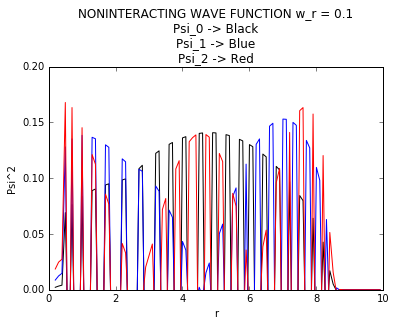

In [93]:
import numpy as np
import math
#step size must be small due to old laptop :(
#It took me 4 hours to figure this out....

#Set up our step number and bounds
n = 100
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#Initialize vector V
V=np.zeros([n+1])
#Build vector V 
i = 1
while (i < n):
    V[i] = (P_min+ i*h)**2
    i+=1
V[n] = (P_max)**2

#Create the matrix for the Schrodinger Equation
e_n = 1/h**2 #only do this computation once
A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
#Initialize Matrix A
A=A_row1
#Build Matrix A
i=2
while (i<n-2):
    A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
    A_next[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_next))
    i+=1
A_last=np.zeros([n-2]);A_last[i-2]=-e_n
A_last[i-1]=2*e_n+V[i]
A=np.vstack((A,A_last))

print("Python's Eigen Values:"
      ,np.linalg.eigh(A)[0][0],np.linalg.eigh(A)[0][1],np.linalg.eigh(A)[0][2])

#Prepare for Plotting!
Psi_0=np.linalg.eigh(A)[1][0]
Psi_1=np.linalg.eigh(A)[1][1]
Psi_2=np.linalg.eigh(A)[1][2]
Waves=[Psi_0,Psi_1,Psi_2]

j=0
while j<3:
    k=0
    while k < 3:
        Waves[j][k]=Waves[j][k]**2
        k=k+1
    j=j+1

#Initialize vector r
r=np.zeros([n-2])
i = 2
while (i < n):
    r[i-2] = (P_min + i*h)
    i+=1

#Plotting
from pylab import *
%matplotlib inline
xlabel("r")
ylabel("Psi^2")
axes = plt.gca()
axes.set_xlim([0,10.0])
axes.set_ylim([0,0.2])
title("NONINTERACTING WAVE FUNCTION w_r = 0.1\nPsi_0 -> Black\nPsi_1 -> Blue\nPsi_2 -> Red")
#You can comment out some of there lines if you wish.
plot(r,Waves[0],color="black")
plot(r,Waves[1],color="blue")
plot(r,Waves[2],color="red")
#Suppress output from plotting section
print("")

### Plotting: Interacting Wave Function

Python's Eigen Values for w_r = 0.1 : 0.602114374801 1.01713685191 1.5690795602



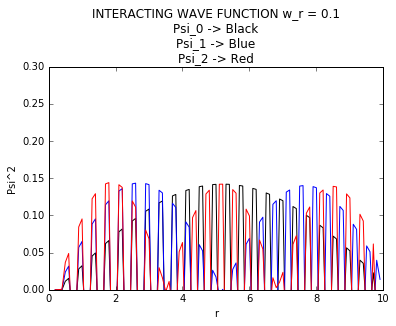

In [103]:
#Set oscillator potential (w_r)
w_r=0.1
import numpy as np
import math
#step size must be small due to old laptop :(
#It took me 4 hours to figure this out....

#Set up our step number and bounds
n = 100
P_min = 0
P_max = 10
h = (P_max-P_min)/n

#loop over values of w_r
#Initialize vector V
V=np.zeros([n+1])
#Build vector V
i = 1
while (i < n):
    V[i] = w_r**2*(P_min+ i*h)**2 + 1/(P_min+ i*h)
    i+=1
V[n] = (P_max)**2

#Create the matrix for the Schrodinger Equation
e_n = 1/h**2 #only do this computation once
A_row1=np.zeros([n-2]);A_row1[0]=2*e_n+V[1];A_row1[1]=-e_n
#Initialize Matrix A
A=A_row1
#Build Matrix A
i=2
while (i<n-2):
    A_next=np.zeros([n-2]);A_next[i-2]=A_next[i]=-e_n
    A_next[i-1]=2*e_n+V[i]
    A=np.vstack((A,A_next))
    i+=1
A_last=np.zeros([n-2]);A_last[i-2]=-e_n
A_last[i-1]=2*e_n+V[i]
A=np.vstack((A,A_last))
print("Python's Eigen Values for w_r =",
    w_r,":",np.linalg.eigh(A)[0][0],np.linalg.eigh(A)[0][1],np.linalg.eigh(A)[0][2])
    
#Prepare for Plotting!
Psi_0=np.linalg.eigh(A)[1][0]
Psi_1=np.linalg.eigh(A)[1][1]
Psi_2=np.linalg.eigh(A)[1][2]
Waves=[Psi_0,Psi_1,Psi_2]

j=0
while j<3:
    k=0
    while k < 3:
        Waves[j][k]=Waves[j][k]**2
        k=k+1
    j=j+1

#Initialize vector r
r=np.zeros([n-2])
i = 2
while (i < n):
    r[i-2] = (P_min + i*h)
    i+=1

#Plotting
from pylab import *
%matplotlib inline
xlabel("r")
ylabel("Psi^2")
axes = plt.gca()
axes.set_xlim([0,10.0])
axes.set_ylim([0,0.3])
title("INTERACTING WAVE FUNCTION w_r = 0.1\nPsi_0 -> Black\nPsi_1 -> Blue\nPsi_2 -> Red")
#You can comment out some of there lines if you wish.
plot(r,Waves[0],color="black")
plot(r,Waves[1],color="blue")
plot(r,Waves[2],color="red")
#Suppress output from plotting section
print("")

<a id="cell4.1"></a>
### Section 4 Plots Summary

#### NonInteracting
|$\rho_{max}$ = 10 |  |
|:-----------------|-----------:|
| n = 100          | <img src="Project2_pics/noninteracting.plot.png"> |
#### Interacting

|$\rho_{max}$ = 10 | w_r = 0.1  | w_r = 0.5    | w_r = 1.0 | w_r = 5.0|
|:-----------------|:----------:|:------------:|:---------:|:---------|
| n = 100          | <img src="Project2_pics/w_r=0.1.plot.png"> | <img src="Project2_pics/w_r=0.5.plot.png"> |  <img src="Project2_pics/w_r=1.0.plot.png"> |  <img src="Project2_pics/w_r=5.0.plot.png"> |

Even though I can run smaller time steps, they take a very long time and also I kind of like the way the plots look like this.  I know it's vain, but what are you gonna do?  

On a more serious note, I think there's something important in these plots.  That is that they taught me to understand how I should interpret descrete results.  because we can't actually get a continuous function you need to think of these plots more like histograms.  They ask "in some finite amout of space, how much wave function is there?" and that is what you're actually seeing when you plot these things. 

If you look at the plots you will notice that all of the wave functions have the correct number of nodes.  I think that this provides evidence that my analysis is correct and that my code returns meaningful results.

<a id="cell5.0"></a>
### Conclusion

We can see in the plots above that small values of w_r allow our wave to spread out a little more.  For w_r=0.5 the plot acutally looks very similar to the noninteracting case.  However, as we amp up w_r the wave functions become more and more compressed.

I have not yet done with final project, but out of I,II,and III this project is by far my favorite.  I think it really helped me to understand the meaning of eigenvectors.  In my earlier classes I learned to calculate them, but I must confess that I lacked a clear understanding of their physical relevance.  

I also think that this project made it very clear to me that both Schrodinger's and Heisenberg's formulation of quantum mechanics are indeed equivalent.  Historically Heisenberg was upset that his theory lost some popularity to Schrodinger's because it was more difficult to interpret physically, but I think if he were alive today Heisenberg would have had the last laugh.  